<a href="https://colab.research.google.com/github/Huong2k1/AI_homework/blob/main/Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model

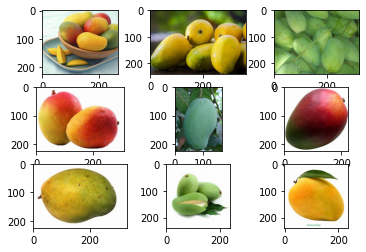

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/gdrive/MyDrive/data_fruit/train/mango/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder +  str(i+1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 64)      

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                 validation_split=0.2
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/gdrive/MyDrive/data_fruit/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

Found 165 images belonging to 11 classes.


In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=50,verbose=1)

Epoch 1/50
17/17 [==============================] - 2s 97ms/step - loss: 0.5382 - accuracy: 0.8485
Epoch 2/50
17/17 [==============================] - 2s 99ms/step - loss: 0.7323 - accuracy: 0.7212
Epoch 3/50
17/17 [==============================] - 2s 100ms/step - loss: 0.7573 - accuracy: 0.7394
Epoch 4/50
17/17 [==============================] - 2s 101ms/step - loss: 0.5330 - accuracy: 0.8000
Epoch 5/50
17/17 [==============================] - 2s 98ms/step - loss: 0.6599 - accuracy: 0.7939
Epoch 6/50
17/17 [==============================] - 2s 96ms/step - loss: 0.4532 - accuracy: 0.8424
Epoch 7/50
17/17 [==============================] - 2s 101ms/step - loss: 0.5431 - accuracy: 0.8061
Epoch 8/50
17/17 [==============================] - 2s 97ms/step - loss: 0.4397 - accuracy: 0.8788
Epoch 9/50
17/17 [==============================] - 2s 94ms/step - loss: 0.5155 - accuracy: 0.8182
Epoch 10/50
17/17 [==============================] - 2s 97ms/step - loss: 0.5263 - accuracy: 0.8364
Epoch 

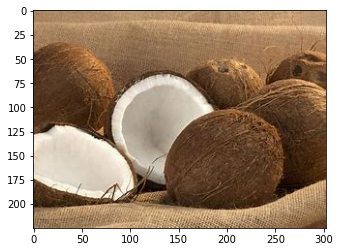

coconut


In [ ]:
filename = '/content/gdrive/MyDrive/data_fruit/test/coconut/19.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('apple')
elif kq ==1:
  print('avocado')
elif kq ==2:
  print('banana')
elif kq ==3:
  print('coconut')
elif kq ==4:
  print('grapefruit')
elif kq ==5:
  print('kiwi')
elif kq ==6:
  print('mango')
elif kq ==7:
  print('orange')
elif kq ==8:
  print('pineapple')
elif kq ==9:
  print('watermelon')


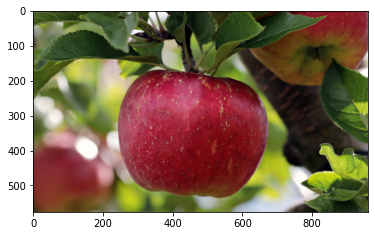

apple


In [ ]:
filename = '/content/gdrive/MyDrive/data_fruit/test/apple/5.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('apple')
elif kq ==1:
  print('avocado')
elif kq ==2:
  print('banana')
elif kq ==3:
  print('coconut')
elif kq ==4:
  print('grapefruit')
elif kq ==5:
  print('kiwi')
elif kq ==6:
  print('mango')
elif kq ==7:
  print('orange')
elif kq ==8:
  print('pineapple')
elif kq ==9:
  print('watermelon')